**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


**Load and Preprocess the MNIST Dataset**

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
num_classes = 10  # Digits 0-9
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Define the model**

In [3]:
# Define the CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.8420 - loss: 0.4978 - val_accuracy: 0.9827 - val_loss: 0.0567
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9712 - loss: 0.0980 - val_accuracy: 0.9865 - val_loss: 0.0454
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9789 - loss: 0.0675 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9828 - loss: 0.0544 - val_accuracy: 0.9893 - val_loss: 0.0376
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9870 - loss: 0.0431 - val_accuracy: 0.9905 - val_loss: 0.0372
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9891 - loss: 0.0377 - val_accuracy: 0.9919 - val_loss: 0.0327
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9907 - val_loss: 0.0398
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9906 -

In [5]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9903 - loss: 0.0296
Test accuracy: 0.9923999905586243


**Visualize prediction on test images**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


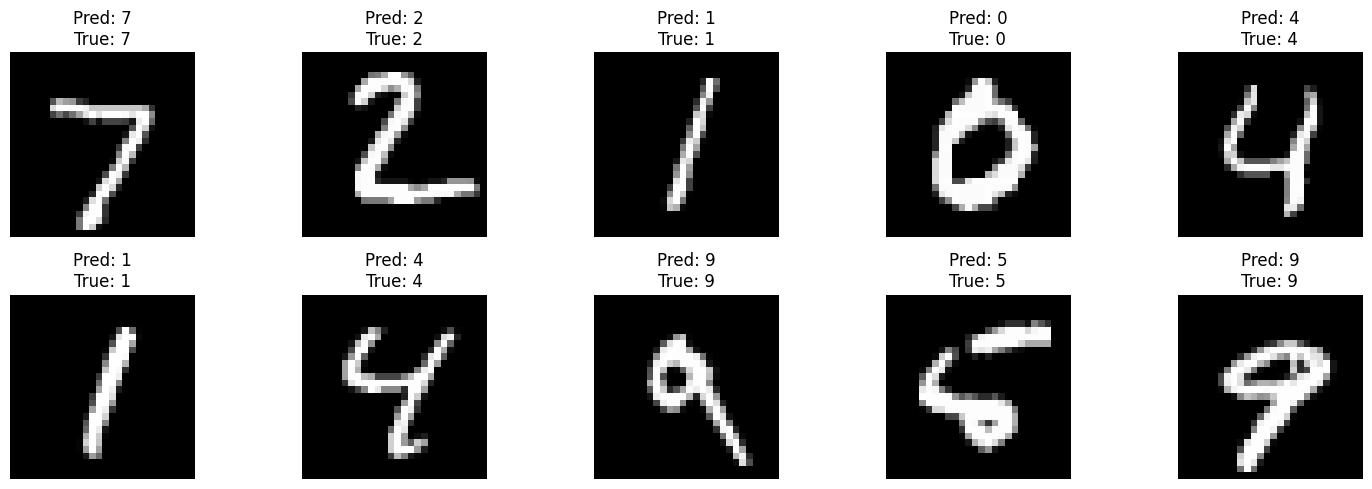

In [6]:
# Function to visualize predictions
def visualize_predictions(model, test_images, test_labels, num_images=10):
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function to visualize predictions
visualize_predictions(model, test_images, test_labels)


In [7]:
from tensorflow.keras.models import load_model
import cv2

# Load the saved model
model = load_model('mnist_ocr_model.h5')

# Function to preprocess a new image and perform OCR
def ocr_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img.reshape(1, 28, 28, 1).astype('float32') / 255
    predictions = model.predict(img)
    predicted_label = np.argmax(predictions, axis=1)[0]
    return predicted_label

# Example usage
new_image_path = 'path_to_your_new_image.png'  # Replace with your new image path
predicted_digit = ocr_image(new_image_path)
print(f'Predicted Digit: {predicted_digit}')
